In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/Social_Network_Ads.csv')

In [3]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=17)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train_scaled,y_train)
model_log.score(X_test_scaled,y_test)

0.85

In [2]:
# KNN model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled,y_train)
model_knn.score(X_test_scaled,y_test)

0.89

In [4]:
# sVM model

In [7]:
from sklearn.svm import SVC
model_lin = SVC(kernel='linear')
model_lin.fit(X_train_scaled,y_train)
model_lin.score(X_test_scaled,y_test)

0.85

In [10]:
model_poly = SVC(kernel='poly')
model_poly.fit(X_train_scaled,y_train)
model_poly.score(X_test_scaled,y_test)

0.89

In [11]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_scaled,y_train)
model_rbf.score(X_test_scaled,y_test)

0.87

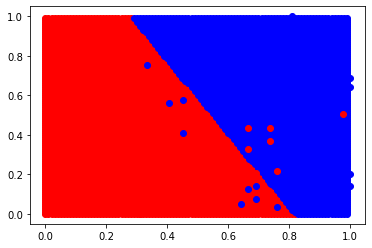

In [26]:
# Predict using Lin kernel
yp = model_lin.predict(grid)
c0 = grid[yp==0]
c1 = grid[yp==1]
plt.scatter(c0[:,0], c0[:,1],c='red')
plt.scatter(c1[:,0], c1[:,1],c='blue')

# Plotting actual class from testing dataset
c0 = X_test_scaled[y_test==0]
c1 = X_test_scaled[y_test==1]
plt.scatter(c0[:,0], c0[:,1],c='red')
plt.scatter(c1[:,0], c1[:,1],c='blue')

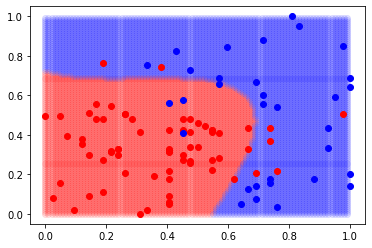

In [29]:
# Predict using Poly kernel
yp = model_poly.predict(grid)
c0 = grid[yp==0]
c1 = grid[yp==1]
plt.scatter(c0[:,0], c0[:,1],c='red',alpha=0.1)
plt.scatter(c1[:,0], c1[:,1],c='blue',alpha=0.1)

# Plotting actual class from testing dataset
c0 = X_test_scaled[y_test==0]
c1 = X_test_scaled[y_test==1]
plt.scatter(c0[:,0], c0[:,1],c='red')
plt.scatter(c1[:,0], c1[:,1],c='blue')

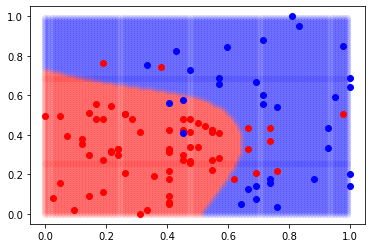

In [30]:
# Predict using RBF kernel
yp = model_rbf.predict(grid)
c0 = grid[yp==0]
c1 = grid[yp==1]
plt.scatter(c0[:,0], c0[:,1],c='red', alpha=0.1)
plt.scatter(c1[:,0], c1[:,1],c='blue', alpha=0.1)

# Plotting actual class from testing dataset
c0 = X_test_scaled[y_test==0]
c1 = X_test_scaled[y_test==1]
plt.scatter(c0[:,0], c0[:,1],c='red')
plt.scatter(c1[:,0], c1[:,1],c='blue')

In [34]:
yp = model_rbf.predict(X_test_scaled)
sum((y_test==yp) & (yp==1))

29

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [43]:
yp = model_rbf.predict(X_test_scaled)
print(confusion_matrix(y_test,yp))
print(recall_score(y_test,yp))
print(precision_score(y_test,yp))

[[58 10]
 [ 3 29]]
0.90625
0.7435897435897436


In [37]:
accuracy_score(y_test,yp)

0.87

In [38]:
yp = model_lin.predict(X_test_scaled)
confusion_matrix(y_test,yp)

array([[62,  6],
       [ 9, 23]], dtype=int64)

In [39]:
accuracy_score(y_test,yp)

0.85

In [40]:
yp = model_poly.predict(X_test_scaled)
confusion_matrix(y_test,yp)

array([[61,  7],
       [ 4, 28]], dtype=int64)

In [41]:
accuracy_score(y_test,yp)

0.89